In [3]:
import torch 
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], #your (x1)
    [0.55, 0.87, 0.66], #journey (x2)
    [0.57, 0.85, 0.64], #starts (x3)
    [0.22, 0.58, 0.33], #with (x4)
    [0.77, 0.25, 0.10], #one (x5)
    [0.05, 0.80, 0.55] #step (x6)
])

/Users/dhaneshkumarkapadia/Desktop/LargeLanguageModel/venv/lib/python3.13/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


In [4]:
query  = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
#print(attn_scores_2)
for i, x_i in enumerate(inputs):
    #print(x_i)
    attn_scores_2[i] = torch.dot(x_i, query)
    #print(attn_scores_2[i])
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [5]:
attn_weights_2_tmp = attn_scores_2 /attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [6]:
def softmax_naive(x):
    return torch.exp(x)/ torch.exp(x).sum(dim =0 )
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [8]:
attn_weights_2 = torch.softmax(attn_scores_2, dim =0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [9]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i] * x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])



3.3.2 Computing attention weights for all input tokens
Generalize to all input sequence tokens:

    Above, we computed the attention weights and context vector for input 2 (as illustrated in the highlighted row in the figure below)
    Next, we are generalizing this computation to compute all attention weights and context vectors
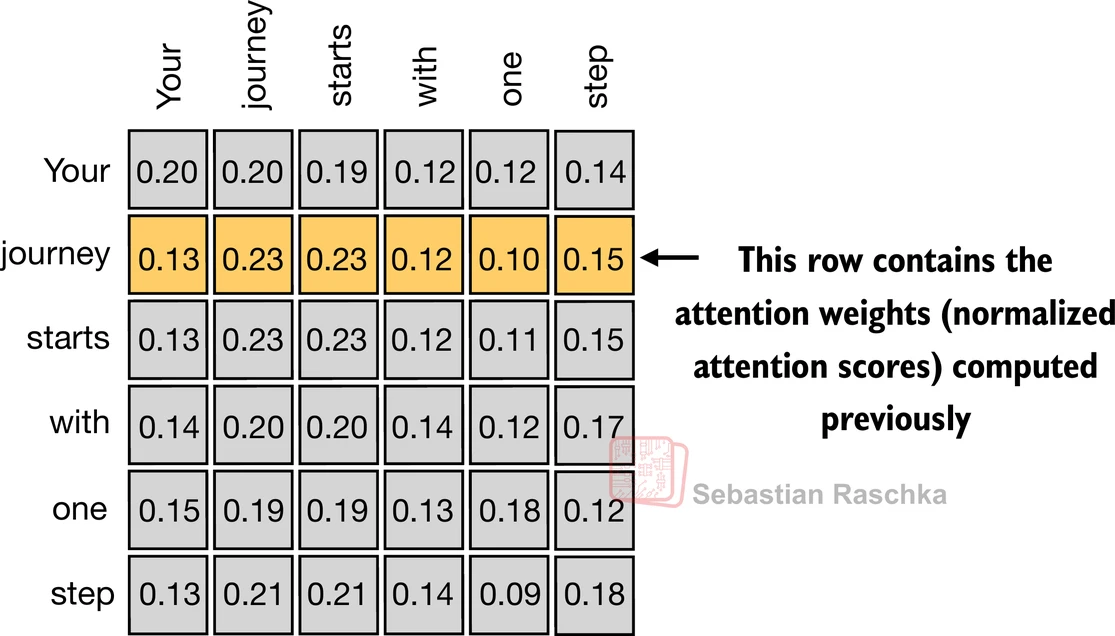
    - (Please note that the numbers in this figure are truncated to two digits after the decimal point to reduce visual clutter; the values in each row should add up to 1.0 or 100%; similarly, digits in other figures are truncated)

    - In self-attention, the process starts with the calculation of attention scores, which are subsequently normalized to derive attention weights that total 1
    These attention weights are then utilized to generate the context vectors through a weighted summation of the inputs
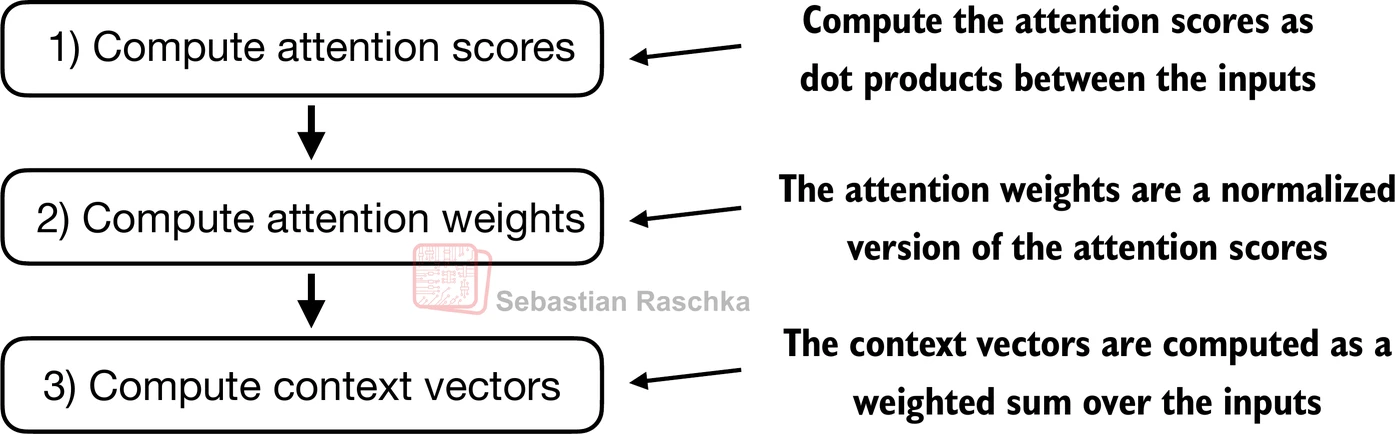
    Apply previous step 1 to all pairwise elements to compute the unnormalized attention score matrix:



In [10]:
attn_scores = torch.empty(6,6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i,j] = torch.dot(x_i , x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [11]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [12]:
attn_weights = torch.softmax(attn_scores , dim =-1)

In [13]:
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [14]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print(row_2_sum)
print("All row sums:", attn_weights.sum(dim=-1))

1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [15]:
all_context_vecs = attn_weights @ inputs 
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [16]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [17]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


## Implementing self-attention with trainable weights

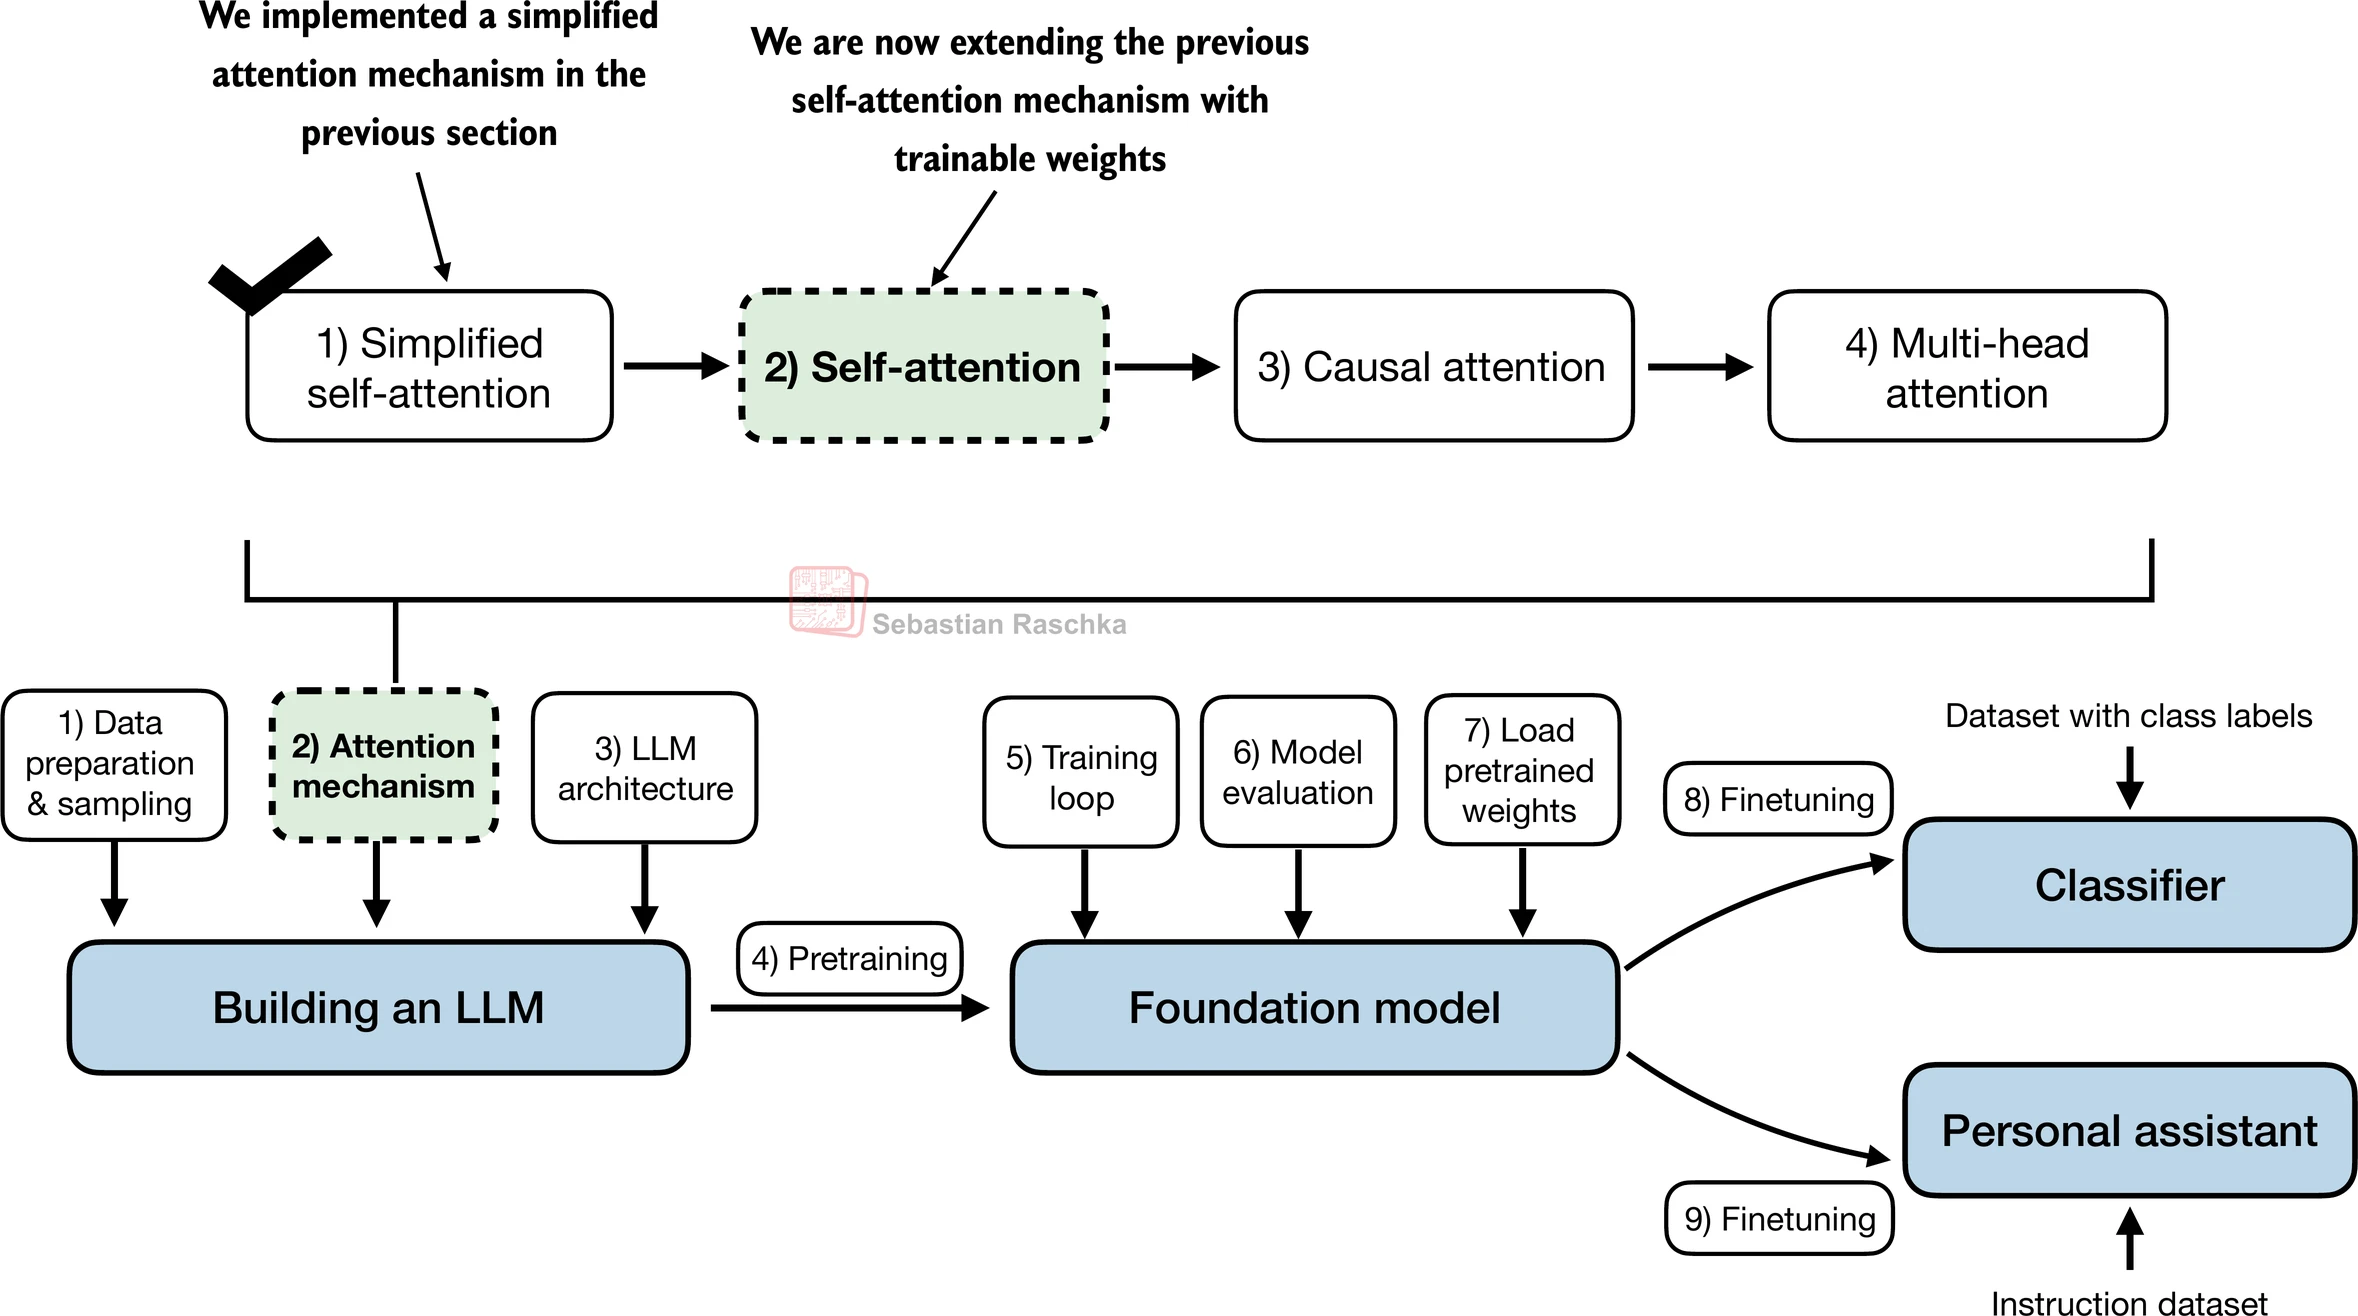